# 基于Keras的CNN数字识别

In [54]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten, Activation

from keras.utils import np_utils
%config inlineBackend.figure_format = 'retina'

In [39]:
# 加载数据
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print type(train)
print train.shape
print test.shape

<class 'pandas.core.frame.DataFrame'>
(42000, 785)
(28000, 784)


In [41]:
# 整理好训练集和测试集 为Keras需要的数据形式
X_train = train.iloc[:,1:].values
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float')
X_train = X_train/255

y_train = train['label'].values
y_train = np_utils.to_categorical(y_train)
num_classes = y_train.shape[1]

X_test = test.values
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float')
X_test = X_test/255

print type(X_train), X_train.shape
print type(y_train), y_train.shape
print type(X_test), X_test.shape
print num_classes

<type 'numpy.ndarray'> (42000, 1, 28, 28)
<type 'numpy.ndarray'> (42000, 10)
<type 'numpy.ndarray'> (28000, 1, 28, 28)
10


In [42]:
# 讲训练集划分交叉验证集
X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train)
print X_train1.shape
print y_train1.shape
print X_train2.shape
print y_train2.shape

(31500, 1, 28, 28)
(31500, 10)
(10500, 1, 28, 28)
(10500, 10)


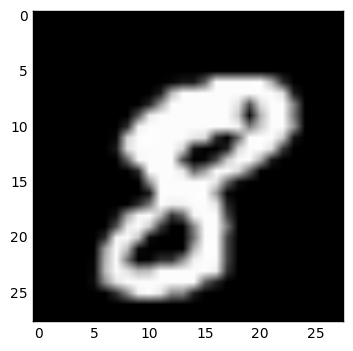

In [44]:
plt.imshow(X_train[10][0], cmap='gray')

In [45]:
# 构建模型CNN
model = Sequential()
# 32个5*5的卷积核，输入图像为1*28*28，input_shape在Theano中为(1,28,28)，在TensorFlow中为(28,28,1)
# 激活函数为relu，其他还有sigmoid，tanh
model.add(Convolution2D(30, 5, 5, border_mode='valid', input_shape=(1, 28, 28), activation='relu'))
# 降采样，就是用一个值来代替一块区域，这个值可以是区域的平均值，最大值，最小值等等，目的就是减少数据量。
# 使用MaxPooling，也就是取2*2的矩阵中最大的那一个代表这一块的特征。 经过降采样后，原来28*28的矩阵就只有14*14了，分成4块
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout 防止过拟合
model.add(Dropout(0.4))
# 第二层卷积层，15个3*3的卷积核
model.add(Convolution2D(15, 3, 3, activation='relu'))
# 再池化
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
# 这上面有2个卷积层
# Flatten 将一个多维矩阵展开，铺平成一个一维的向量。为后面的全连接做准备。
model.add(Flatten())
# 加入第一层神经网络，隐藏层128个神经元
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
# 加入第二城神经网络，隐藏层50个
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.4))
# 上面是2个隐藏层
# 输出层，输出神经元num_classes=10个，输出函数为softmax多元分类
model.add(Dense(num_classes, activation='softmax'))
# 编译
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
# nb_epoch 为训练的轮数，nb统一表示为number of
# batch_size 为进行梯度下降时间每个批次包含的样本数
# verbose 为日志显示，0为不在标准输出流输出日志信息，1为输出进度条记录，2为每个epoch输出一行记录
hist = model.fit(X_train1, y_train1, validation_data=(X_train2, y_train2), nb_epoch=69, batch_size=200, verbose=1)

Train on 31500 samples, validate on 10500 samples
Epoch 1/69
31500/31500 [==============================] - 31s - loss: 1.2685 - acc: 0.5619 - val_loss: 0.2464 - val_acc: 0.9350
Epoch 2/69
31500/31500 [==============================] - 35s - loss: 0.4143 - acc: 0.8781 - val_loss: 0.1320 - val_acc: 0.9629
Epoch 3/69
31500/31500 [==============================] - 31s - loss: 0.2799 - acc: 0.9183 - val_loss: 0.0996 - val_acc: 0.9701
Epoch 4/69
31500/31500 [==============================] - 29s - loss: 0.2284 - acc: 0.9368 - val_loss: 0.0797 - val_acc: 0.9766
Epoch 5/69
31500/31500 [==============================] - 31s - loss: 0.1966 - acc: 0.9454 - val_loss: 0.0740 - val_acc: 0.9788
Epoch 6/69
31500/31500 [==============================] - 31s - loss: 0.1754 - acc: 0.9517 - val_loss: 0.0644 - val_acc: 0.9818
Epoch 7/69
31500/31500 [==============================] - 33s - loss: 0.1599 - acc: 0.9558 - val_loss: 0.0642 - val_acc: 0.9813
Epoch 8/69
31500/31500 [==============================

In [47]:
# 对结果在整个训练集上进行评估
scores = model.evaluate(X_train, y_train, verbose=1)

42000/42000 [==============================] - 30s    


In [48]:
print('Test score:', scores[0])
print('Test accuracy:', scores[1])

('Test score:', 0.014837200643968183)
('Test accuracy:', 0.9964047619047619)


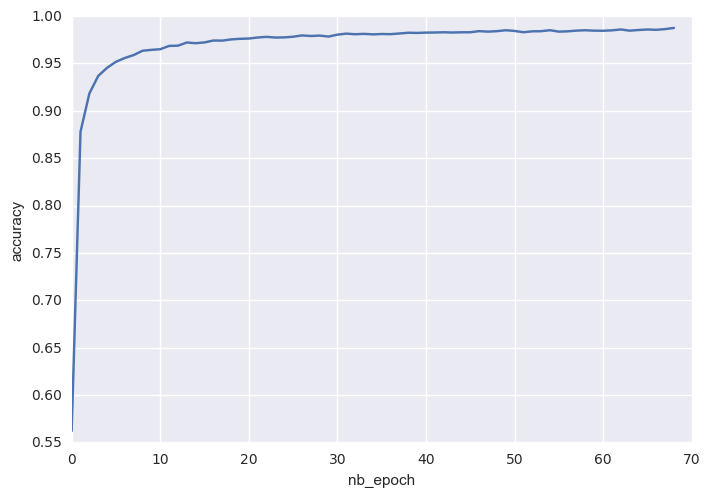

In [55]:
# 可视化一下，看看最后是否收敛
plt.plot(range(len(hist.history['acc'])), hist.history['acc'])
plt.xlabel('nb_epoch')
plt.ylabel('accuracy')
plt.show()

In [51]:
yPred = model.predict_classes(X_test)

28000/28000 [==============================] - 20s    


In [57]:
# 保存结果输出为csv文件
mnistSubmission = pd.DataFrame({
        'ImageID': range(1, len(yPred)+1),
        'Label': yPred
    })
mnistSubmission.to_csv('mnistSubmission.csv', index=False)

# 提交后准确率0.99214